IMPORTS Y DEFINICIONES GLOBALES

In [12]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

e=basis(2,0)
gr=basis(2,1)

g0=tensor(gr,basis(3,0))
e0=tensor(e,basis(3,0))
g1=tensor(gr,basis(3,1))

sz=tensor(sigmaz(),qeye(3))
sp=tensor(sigmap(),qeye(3))
sm=tensor(sigmam(),qeye(3))
a=tensor(qeye(2),destroy(3))

w_0=1
g=0.001*w_0

ESFERA DE BLOCH

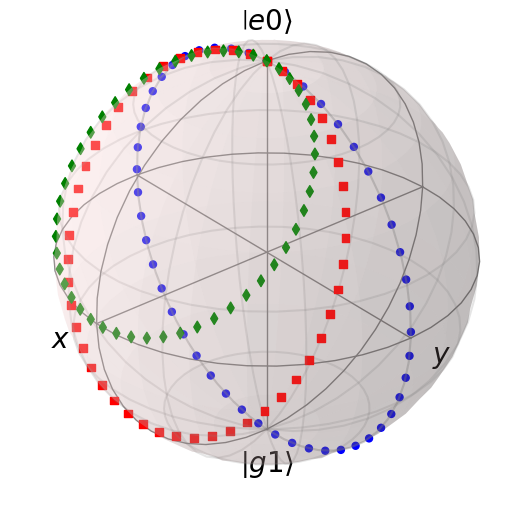

In [13]:
def omega_n(n_:int,delta:float):
    return np.sqrt(delta**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)+delta)/(2*omega_n(n_,delta)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)-delta)/(2*omega_n(n_,delta)))

'''---Esfera de bloch para enfoque cinematico---'''

esfera=Bloch()
esfera.make_sphere()
esfera.clear()

color=['blue','red','green','black']
for ind,delta in enumerate([0,g,2*g]):
    t=np.linspace(0,2*np.pi/omega_n(1,delta))
    b=-1j*np.sqrt(omega_n(1,delta)**2-delta**2)/omega_n(1,delta)*np.sin(omega_n(1,delta)*t/2)
    a=(omega_n(1,delta)-delta)/(2*omega_n(1,delta))*np.exp(1j*omega_n(1,delta)*t/2)+(omega_n(1,delta)+delta)/(2*omega_n(1,delta))*np.exp(-1j*omega_n(1,delta)*t/2)
    ux=np.real(b/a)
    uy=np.imag(b/a)
    px=(2*ux)/(1+ux**2+uy**2)
    py=(2*uy)/(1+ux**2+uy**2)
    pz=(1-ux**2-uy**2)/(1+ux**2+uy**2)
    points=[px,py,pz]

    esfera.add_points(points,colors=color[ind])


# esfera.view([-40,30])

esfera.render()
esfera.show()
# esfera.save('bloch cinematica.png')

'''---Fase de Berry---'''
esfera.clear()

for inde,delta in enumerate([0,g,2*g]):
    for omega in np.linspace(0,2*np.pi):
        psi_plus=cos_theta_n(1,delta)*e+np.exp(-1j*omega)*sin_theta_n(1,delta)*gr
        # psi_minus=-sin_theta_n(1,delta)*e0+np.exp(-1j*omega)*cos_theta_n(1,delta)*g1
        vec = [expect(sigmax(), psi_plus),
                expect(sigmay(), psi_plus),
                expect(sigmaz(), psi_plus)]

        esfera.add_points(vec,colors=color[inde])

esfera.render()
# esfera.save('bloch berry.png')
esfera.show()

DISIPATIVO Y REPRODUCCION DE GRAFICOS LUDMI

In [14]:
H=delta/2*sz + g*(a.dag())

AttributeError: 'numpy.ndarray' object has no attribute 'dag'